In [1]:
import pm4py
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file_path = './data/PermitLog.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/7065 [00:00<?, ?it/s]

In [7]:
from pm4py.statistics.traces.generic.log import case_statistics

# Ver las 5 trazas más frecuentes
traces = case_statistics.get_most_common_traces(event_log)
print(traces[:5])

AttributeError: module 'pm4py.statistics.traces.generic.log.case_statistics' has no attribute 'get_most_common_traces'

In [37]:
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Start trip': 734, 'Permit SUBMITTED by EMPLOYEE': 6319, 'Permit SAVED by EMPLOYEE': 12}
End activities: {'Payment Handled': 5474, 'Permit SAVED by EMPLOYEE': 4, 'Declaration SAVED by EMPLOYEE': 28, 'Send Reminder': 991, 'Permit REJECTED by MISSING': 38, 'End trip': 453, 'Declaration REJECTED by MISSING': 2, 'Declaration REJECTED by EMPLOYEE': 28, 'Permit REJECTED by EMPLOYEE': 31, 'Permit FINAL_APPROVED by SUPERVISOR': 14, 'Request Payment': 1, 'Declaration REJECTED by SUPERVISOR': 1}


In [35]:
def plot_with_perc(data, title):
    keys = list(data.keys())
    values = np.array([data.get(k, 0) for k in keys])
    percentages = (values / sum(values)) * 100

    # Configuración del gráfico
    x = np.arange(len(keys))  # Posiciones para las barras
    width = 0.4  # Ancho de las barras

    plt.figure(figsize=(12, 6))

    # Gráfico de barras
    bars = plt.bar(x, values, width, label='Start Activities')

    # Etiquetas de porcentajes sobre las barras
    for bar, perc in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{perc:.1f}%', 
                ha='center', va='bottom', fontsize=9)

    # Configuración de etiquetas y leyenda
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.title(title + ' Count with Percentages')
    plt.xticks(x, keys, rotation=90)
    plt.legend()

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()


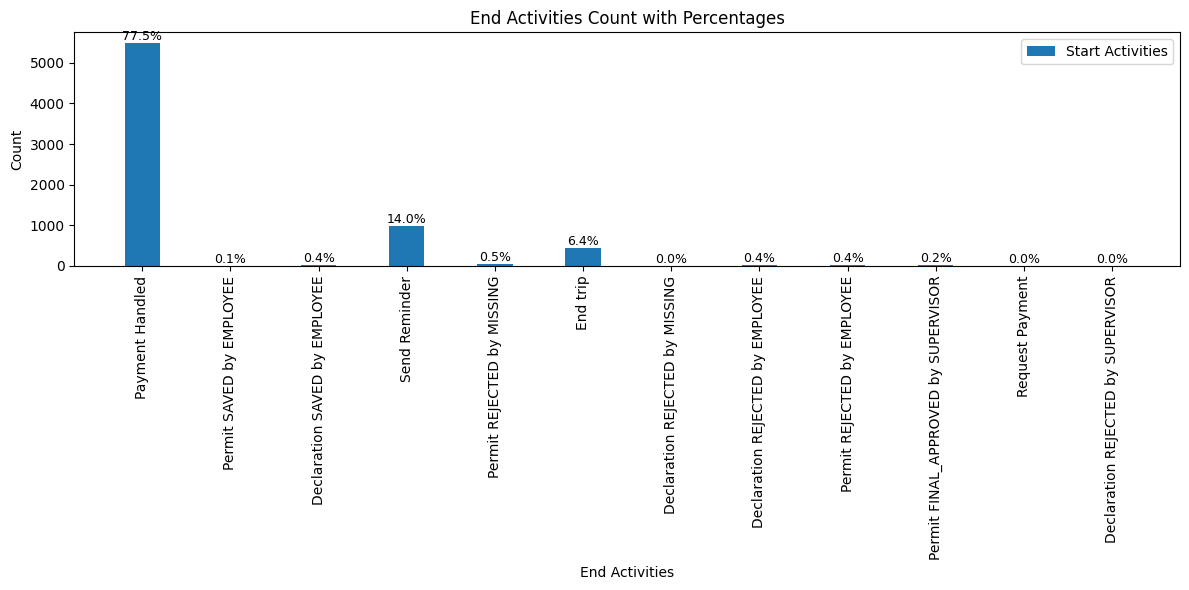

In [36]:
plot_with_perc(end_activities, 'End Activities')

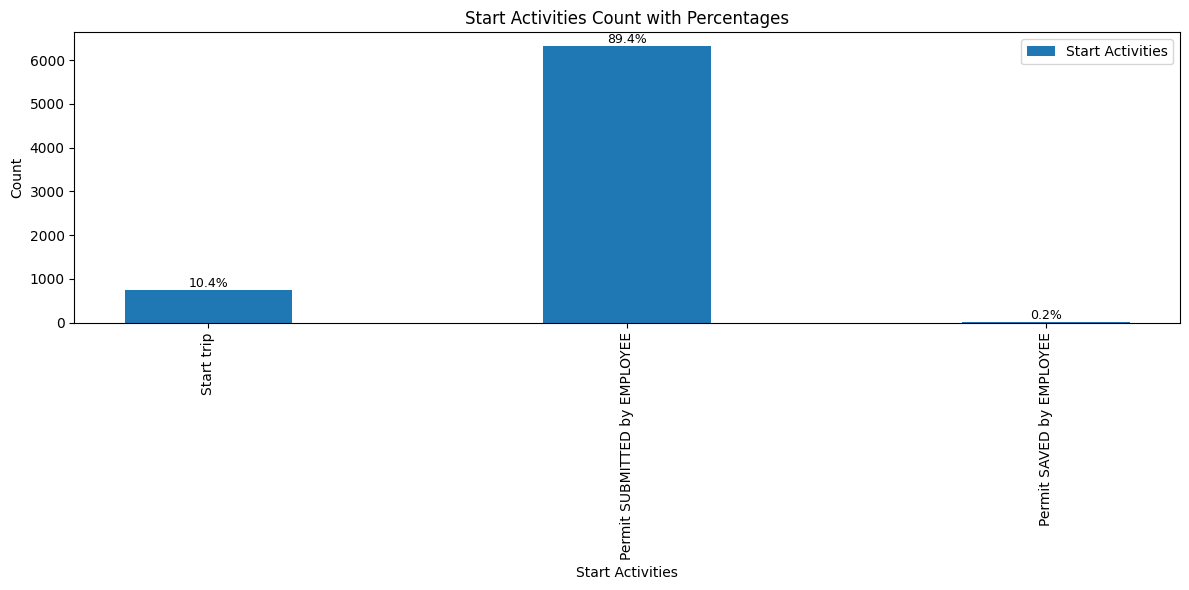

In [38]:
plot_with_perc(start_activities, 'Start Activities')

In [ ]:
pm4py.view_dotted_chart(event_log)

In [ ]:
case_arrival = pm4py.get_case_arrival_average(event_log)
case_arrival